# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования**

1. Определение ключевых данных для построения автоматизированной системы отслеживания аномалий и мошеннической деятельности
1. Создание теории влияния различных факторов на ценообразование объектов недвижимости
1. Определение рыночной стоимости объектов недвижимости

**Ход исследования**

Исследование начинается с получения данных из файла `/datasets/real`. Далее происходит анализ качества данных: обзор содержимого датасета при помощи различных методов представления информации. 

После оценки содержимого начинается этап предобработки данных, в котором необходимо избавиться от таких ошибок как пропуски, дубликаты, аномалии и выбросы, а также оптимизировать типы данных для удобства последующего аналазиа.

Далее идет этап добавления новых данных на основе имеющихся: цена одного квадратного метра, тип этажа квартиры, расстояние до центра Санкт-Петербурга в км, раздельные день, месяц и год публикации объявления. 

На этапе исследовательского анализа данных происходит поиск интересных закономерностей в имеющихся данных, оценка корреляции базовых параметров с стоимостью недвижимости, а также расчет некоторых характеристик на основе категоризации данных. 

После чего полученная информация компилируется в общий вывод, содержащий информацию по проделанной работе и найденным зависимостям.

## Откройте файл с данными и изучите общую информацию. 

### Импортируем Pandas и Matplotlib, считываем данные csv-файла, выводим первые 5 строк

In [9]:
import pandas as pd
import matplotlib as plt

In [10]:
try:
    data = pd.read_csv(
        r"C:\workspace\yandex_cources\full_history\sprint_2_EDA\data\real_estate_data.csv",
        sep="\t",
    )
except:
    data = pd.read_csv("/datasets/real_estate_data.csv", sep="\t")

In [11]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Общая информация о таблице при помощи метода .info()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Общее описание таблицы при помощи метода .describe()

In [13]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Отметим выделяющиеся значения:
- минимальное значение в столбце last_price. Квартира за 12 тысяч? Дайте две!
- ceiling_height min 1, max 100
- airport nearest 0 - квартира в самолете?
- floors_total max 60 - такого в Питере не может быть, в Лахте квартир нет

### Названия колонок

In [14]:
data.rename(columns={"cityCenters_nearest": "city_centers_nearest"}, inplace=True)
data.columns.str.lower()

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

По крайней мере с названиями колонок все хорошо :)

### Гистограммы

По столбцу first_day_exposition hist просто так не построишь
По столбцу is_apartment hist просто так не построишь
По столбцу studio hist просто так не построишь
По столбцу open_plan hist просто так не построишь
По столбцу locality_name hist просто так не построишь


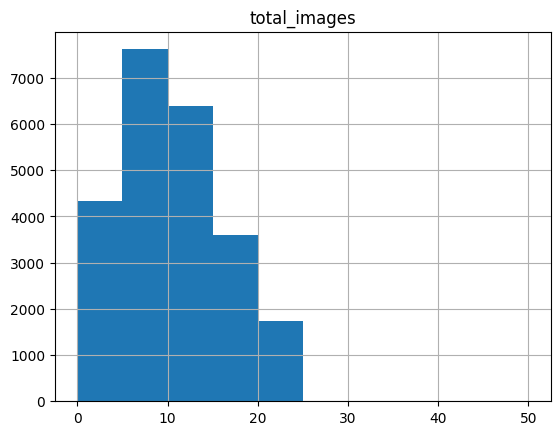

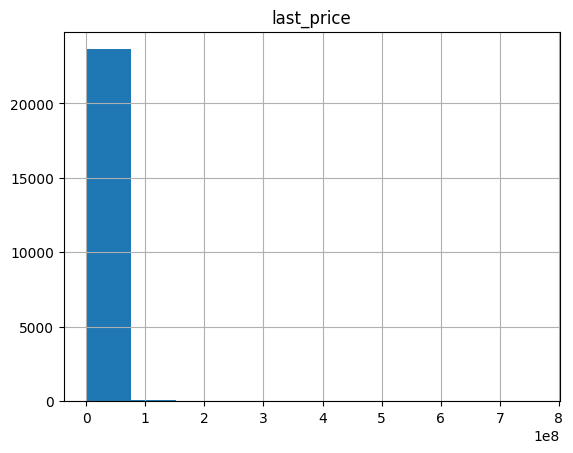

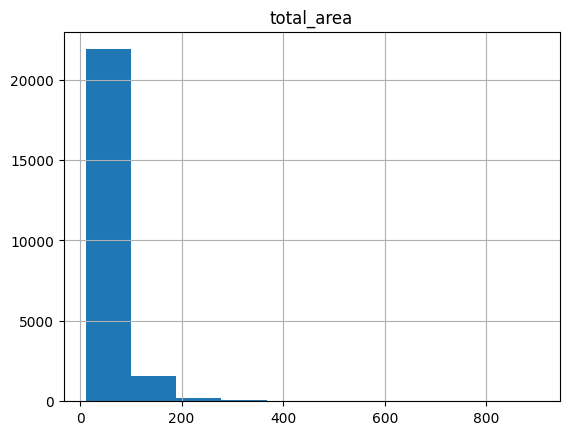

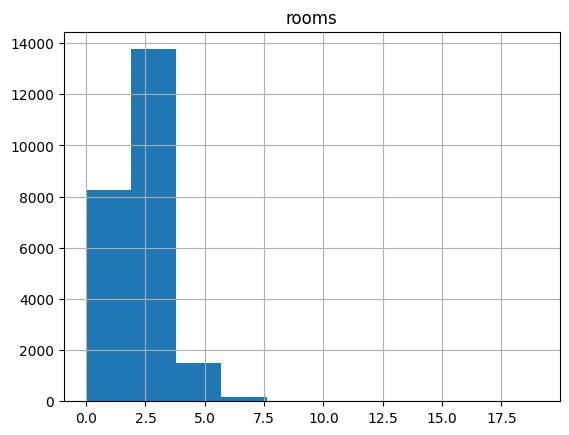

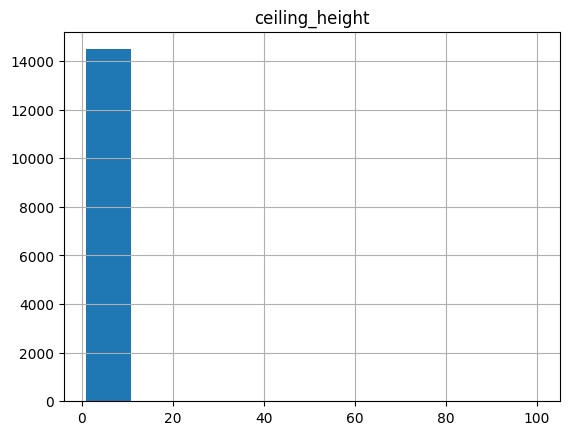

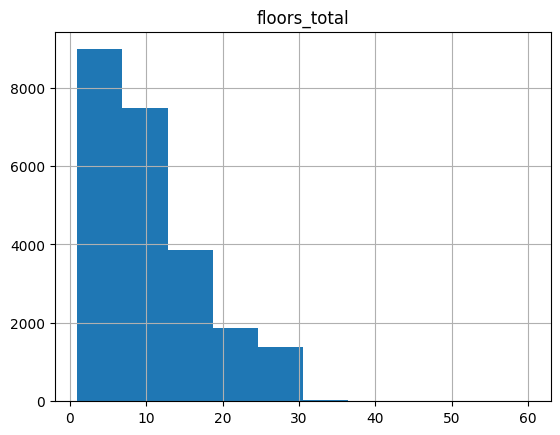

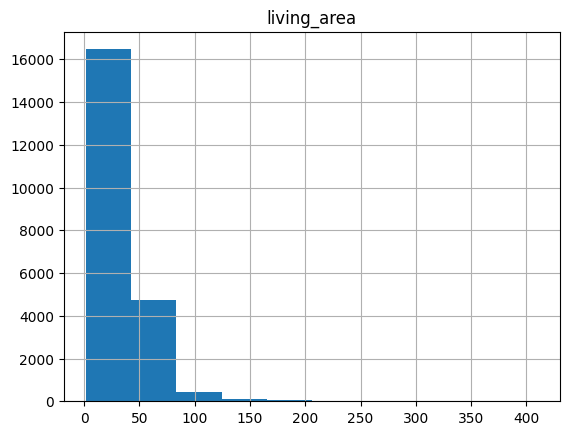

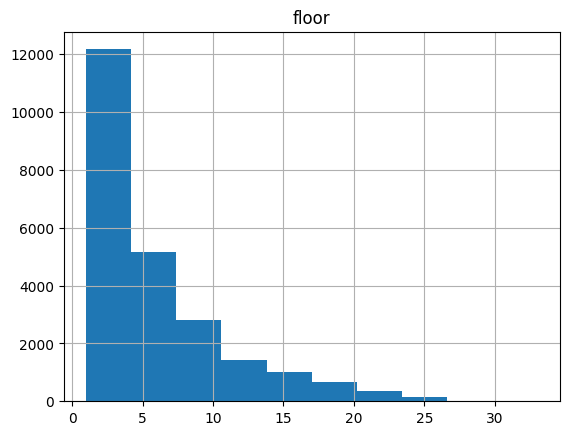

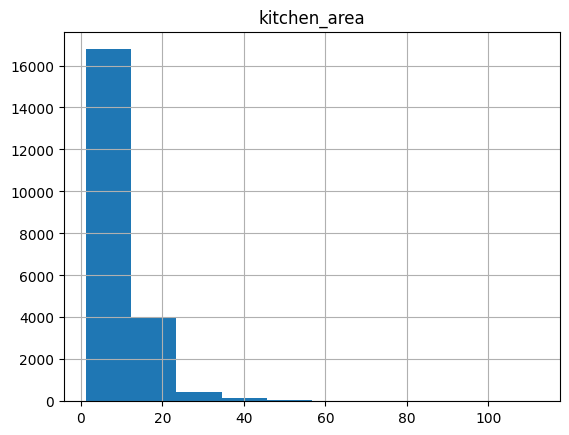

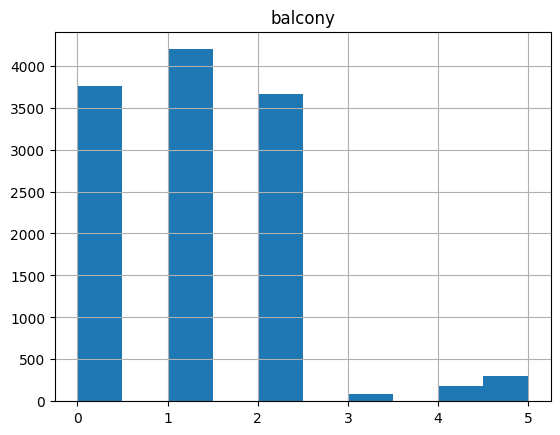

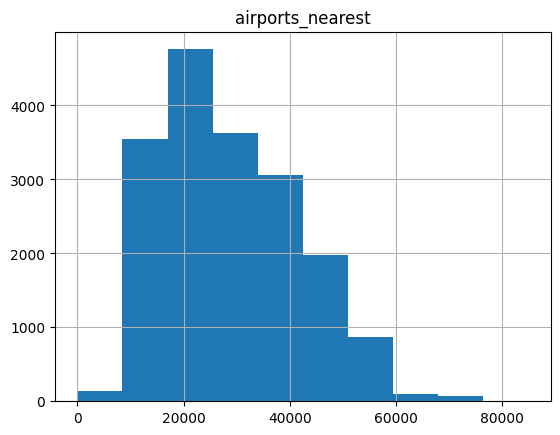

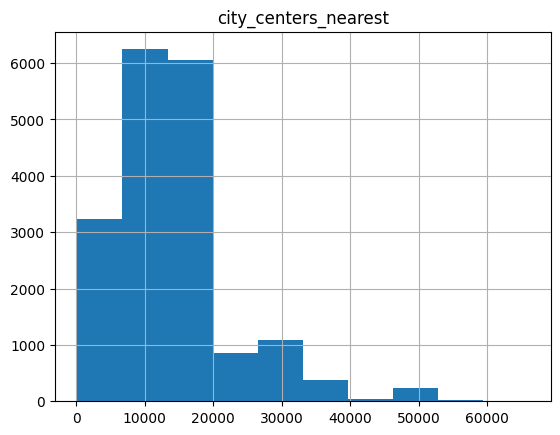

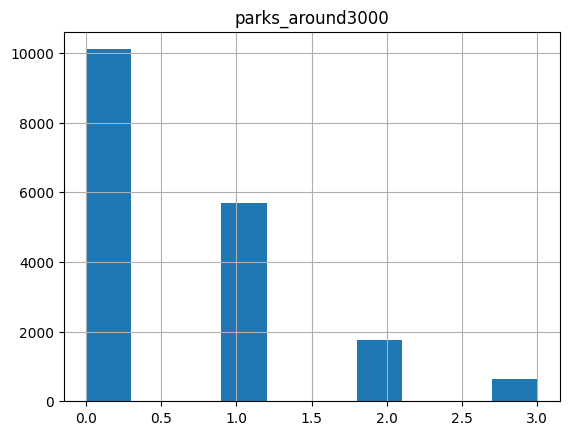

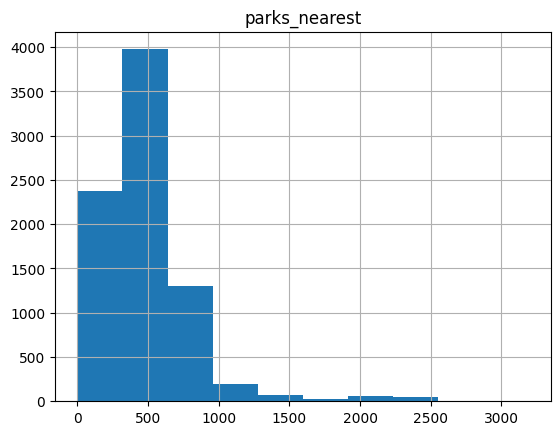

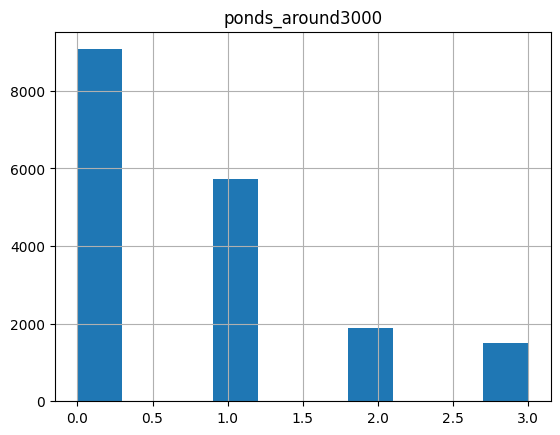

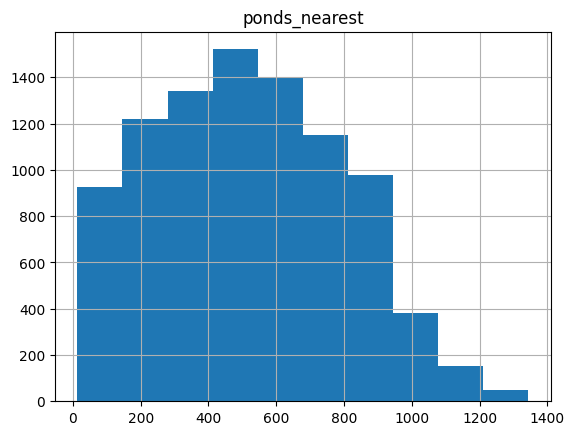

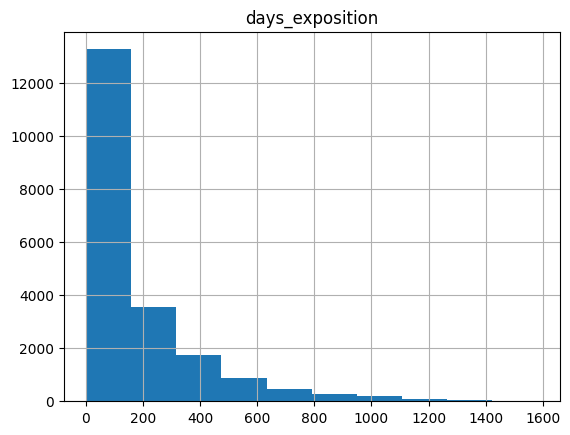

In [15]:
for column in data.columns:
    try:
        data.hist(column=column)
    except:
        print(f"По столбцу {column} hist просто так не построишь")

Стоит обратить внимание, что многие гистограммы оказались не очень информативны из-за размаха по оси абсцисс, обусловенного редкими значениями. Позже их нужно будет убрать и посмотроить гистограммы заново.

Пропущенные столбцы также пока проигнорируем, поскольку из них, вероятно, можно вытащить лишь информацию "какой процент от общего числа".

### Вывод по разделу

Исследуемый датасет имеет значительное количество пропусков, в нем присутствуют признаки наличия аномалий и выбросов. Необходима глубокая предобработка данных.

## Предобработка данных

In [16]:
pd.DataFrame(round(data.isna().mean() * 100)).style.background_gradient("coolwarm")

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


### Удаление пропусков и обработка дубликатов

In [17]:
data.duplicated().sum()

0

#### locality_name

In [18]:
data["locality_name"].isna().sum()

49

Пропуски могли появиться в результате технической ошибки. В дальнейшем исследовании название населенного пункта пригодится и угадывать его не хочется. Поэтому столбцы с пропусками просто удалим:

In [19]:
data.dropna(subset=["locality_name"], inplace=True)
data["locality_name"].isna().sum()

0

In [20]:
data.reset_index(drop=True, inplace=True)

Также нужно избавиться от неявных дубликатов среди названий локаций. Отфильтруем названия таким образом, чтобы остались лишь названия населенных пунктов:

In [21]:
names = []
for name in data["locality_name"]:
    split = name.split()
    final_name = ""
    i = 0
    for word in split:
        if i > 0:
            final_name += " "
        if word[0].isupper():
            final_name += word
            i += 1
    final_name.rstrip()
    names.append(final_name)

names_series = pd.Series(data=names)
data["locality_name_new"] = names_series
data["locality_name_new"].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

#### ceiling_height
Рассмотрим столбец ceiling_height:

In [22]:
temp = data.sort_values(by="ceiling_height")
temp["ceiling_height"].unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Видно две проблемы:  
1) Присутствуют слишком малые  и слишком большие показатели высоты потолка: менее 2 метров и более 5 метров.  
2) Пристствуют незаполненные значения NaN  
Посмотрим как часто встречаются пропуски:

In [23]:
len(data[data["ceiling_height"].isna()])

9160

9160 объектов с пропущенными данными в столбце ceiling_height, то есть около 40% датасета. Слишком много, чтобы просто удалить строки. Заполним пропуски медианным значением для данного населенного пункта

In [24]:
ceiling_height_medians = data.pivot_table(
    index="locality_name_new", values="ceiling_height", aggfunc="median"
)

for index in data[data["ceiling_height"].isna()].index:
    try:
        data.loc[index, "ceiling_height"] = ceiling_height_medians.loc[
            data.loc[index, "locality_name_new"], "ceiling_height"
        ]
    except:
        continue

Оставшиеся пропуски заполним медианным значением по Ленинградской области

In [25]:
data["ceiling_height"].fillna(
    data[data["locality_name_new"] != "Санкт-Петербург"]["ceiling_height"].median(),
    inplace=True,
)
len(data[data["ceiling_height"].isna()])

0

#### floors_total

In [26]:
print(data["floors_total"].isna().sum())

data["floors_total"].unique()

85


array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

Пустышек немного и определить какое значение там должно было быть невозможно. В анализе данный параметр будет использован, поэтому удалим строки с пропущенным значением

In [27]:
data.dropna(subset=["floors_total"], inplace=True)
print(len(data[data["floors_total"].isna()]))

0


In [28]:
data.reset_index(drop=True, inplace=True)

#### living_area

In [29]:
data["living_area"].isna().sum()

1865

Заполним пропуски медианными значениями жилой площади, разбив квартиры на группы по количеству комнат

In [30]:
living_area_pivot = data[~data["living_area"].isna()].pivot_table(
    index="rooms", values="living_area", aggfunc="median"
)

for rooms in living_area_pivot.index:
    data.loc[
        (data["rooms"] == rooms) & (data["living_area"].isna()), "living_area"
    ] = living_area_pivot.loc[rooms, "living_area"]

data["living_area"].isna().sum()

0

#### is_apartment

Здесь все будет достаточно просто. Достаточно заполнить все пустые ячейки значением False, ведь отсутствующее значение скорее всего сигнализирует что квартира не является апартаментами

In [31]:
data["is_apartment"].fillna(False, inplace=True)
print(data["is_apartment"].unique(), data["is_apartment"].isna().sum())

[False  True] 0


#### kitchen_area

С площадью кухни можно поступить аналогично жилой площади - разбить квартиры на группы по числу комнат и посчитать для каждой группы медианную площадь кухни. Однако стоит держать в уме, что данный метод имеет допустимую точность лишь относительно типовых квартир. В случае элитной недвижимости разброс может быть колоссальным, ведь в таком жилье планировка делается под "хотелки" клиента.

In [32]:
data["kitchen_area"].isna().sum()

2222

In [33]:
kitchen_area_pivot = data[~data["kitchen_area"].isna()].pivot_table(
    index="rooms", values="kitchen_area", aggfunc="median"
)
for rooms in kitchen_area_pivot.index:
    data.loc[
        (data["rooms"] == rooms) & (data["kitchen_area"].isna()), "kitchen_area"
    ] = kitchen_area_pivot.loc[rooms, "kitchen_area"]

print(data["kitchen_area"].isna().sum())

194


Осталось 194 пустых ячейки. Вероятно, это потому, что площадь кухни в квартирах, где число комнат равно 0, не указано. Проставим для таких квартир площадь кухни 0 (нет кухни - нет площади)

In [34]:
data["kitchen_area"].fillna(0, inplace=True)
data["kitchen_area"].isna().sum()

0

#### balcony

Отсутствующее значение = нет балкона, то есть 0. Будем придерживаться этой идеи

In [35]:
data["balcony"].fillna(0, inplace=True)
data["balcony"].isna().sum()

0

#### airports_nearest  


In [36]:
data["airports_nearest"].isna().sum()

5524

Данный столбец показывает расстояние до ближайшего аэропорта. Нам повезло, речь идет о Питере, значит аэропорт один. Тогда пропуски можно заполнить медианным значением для конкретного населенного пункта

In [37]:
airport_pivot = data[~data["airports_nearest"].isna()].pivot_table(
    index="locality_name_new", values="airports_nearest", aggfunc="median"
)

for locality in airport_pivot.index:
    data.loc[
        (data["locality_name_new"] == locality) & (data["airports_nearest"].isna()),
        "airports_nearest",
    ] = airport_pivot.loc[locality, "airports_nearest"]

data["airports_nearest"].isna().sum()

5432

Картина поменялась в лучшую сторону, но не сильно. Это может быть связано с тем, что для отдельных населенных пунктов расстояние не указывалось ни разу. В этом случае с пропусками уже ничего сделать не получится. Оставим как есть

Природа появления данных пропусков мне не особо ясна. Можно было бы предположить, что когда-то сервис не умел сам рассчитывать расстояние, однако привязки к дате публикации у пропусков нет

Хорошо бы привести все значения в столбце к типу int, но наличие пропусков не позволяет

In [38]:
# в подтверждение слов выше, Копорье оказалось обделено информацией о ближайшем аэропорте во всех строках
data[data["locality_name_new"] == "Копорье"]["airports_nearest"]

497     NaN
4708    NaN
12683   NaN
15220   NaN
23457   NaN
Name: airports_nearest, dtype: float64

#### city_centers_nearest

С данным параметром поступим аналогично предыдущему пункту

In [39]:
data["city_centers_nearest"].isna().sum()

5501

In [40]:
city_centers_nearest_medians = data.pivot_table(
    index="locality_name_new", values="city_centers_nearest", aggfunc="median"
)

for index in data[data["city_centers_nearest"].isna()].index:
    try:
        data.loc[index, "city_centers_nearest"] = city_centers_nearest_medians.loc[
            data.loc[index, "locality_name_new"], "city_centers_nearest"
        ]
    except:
        continue

data["city_centers_nearest"].isna().sum()

5432

Полагаю, в этой колонке пропуски также придется оставить, ведь информация о расстоянии до центра (центра Петербурга) в основном актуальна для объектов в Санкт-Петербурге и городах-спутниках, а для деревней, сел и поселков вполне может быть не указана за ненадобностью

#### parks_around3000 

In [41]:
print(data["parks_around3000"].unique())
data["parks_around3000"].isna().sum()

[ 1.  0.  2. nan  3.]


5500

Вероятно, пропуски в данном столбце означают что парков поблизости нет. Заменим NaNы на 0

In [42]:
data["parks_around3000"].fillna(0, inplace=True)

#### parks_nearest

In [43]:
data["parks_nearest"].isna().sum()

15535

In [44]:
data[~data["parks_nearest"].isna()]["locality_name_new"].unique()

array(['Санкт-Петербург', 'Петергоф', 'Пушкин', 'Кронштадт', 'Колпино',
       'Павловск', 'Сестрорецк', 'Зеленогорск', 'Красное Село',
       'Стрельна', 'Ломоносов', 'Парголово'], dtype=object)

Информация о ближайших парках указана только для Петербурга и некоторых городов-спутников, что вполне логично, ведь в малых поселениях природа и так повсюду. Осталось разобраться с возможными пропусками в случае городов из списка выше:

In [45]:
proof = data[~data["parks_nearest"].isna()]["locality_name_new"].unique()
print(
    data[(data["parks_nearest"].isna()) & (data["locality_name_new"].isin(proof))][
        ["parks_around3000", "parks_nearest"]
    ].head(10)
)
data[(data["parks_nearest"].isna()) & (data["locality_name_new"].isin(proof))][
    "parks_nearest"
].unique()

    parks_around3000  parks_nearest
6                0.0            NaN
7                0.0            NaN
9                0.0            NaN
11               0.0            NaN
14               0.0            NaN
17               0.0            NaN
19               0.0            NaN
20               0.0            NaN
25               0.0            NaN
26               0.0            NaN


array([nan])

Похоже что все NaNы связаны с отсутствием парков поблизости. Оставляем все как есть

#### ponds_around3000

Аналогично параметру parks_around3000

In [46]:
print(data["ponds_around3000"].unique())
data["ponds_around3000"].isna().sum()

[ 2.  0.  3.  1. nan]


5500

In [47]:
data["ponds_around3000"].fillna(0, inplace=True)

#### ponds_nearest

Аналогично параметру parks_nearest

In [48]:
data["ponds_nearest"].isna().sum()

14529

In [49]:
data[~data["ponds_nearest"].isna()]["locality_name_new"].unique()

array(['Санкт-Петербург', 'Петергоф', 'Пушкин', 'Шушары', 'Ломоносов',
       'Кронштадт', 'Парголово', 'Колпино', 'Павловск', 'Сестрорецк',
       'Зеленогорск', 'Александровская', 'Понтонный', 'Красное Село',
       'Петро-Славянка', 'Стрельна', 'Сапёрный', 'Белоостров'],
      dtype=object)

In [50]:
proof = data[~data["ponds_nearest"].isna()]["locality_name_new"].unique()
print(
    data[(data["ponds_nearest"].isna()) & (data["locality_name_new"].isin(proof))][
        ["ponds_around3000", "ponds_nearest"]
    ].head(10)
)
data[(data["ponds_nearest"].isna()) & (data["locality_name_new"].isin(proof))][
    "ponds_nearest"
].unique()

    ponds_around3000  ponds_nearest
1                0.0            NaN
6                0.0            NaN
7                0.0            NaN
9                0.0            NaN
11               0.0            NaN
16               0.0            NaN
18               0.0            NaN
19               0.0            NaN
20               0.0            NaN
21               0.0            NaN


array([nan])

Да, все действительно аналогично. Дополнительных действий над NaNами не требуется

#### days_exposition

In [51]:
data["days_exposition"].isna().sum()

3171

In [52]:
data[data["days_exposition"].isna()]["first_day_exposition"].head(10)

0     2019-03-07T00:00:00
7     2019-04-18T00:00:00
44    2018-11-18T00:00:00
45    2018-12-02T00:00:00
46    2019-01-31T00:00:00
49    2018-11-22T00:00:00
52    2017-09-22T00:00:00
71    2019-03-27T00:00:00
81    2018-12-27T00:00:00
84    2019-03-13T00:00:00
Name: first_day_exposition, dtype: object

Похоже что не все квартиры в датасете успели продаться и именно об этом сигнализируют пропуски в столбце days_exposition. Заполнить их не получится и удалять 3 тысячи строк нельзя, поэтому оставим как есть

Из-за пропусков тип days_exposition останется float, хотя должен бы быть int

### Обработка аномальных значений

Как было сказано ранее, присутствуют слишком малые и слишком большие показатели высоты потолка: менее 2 метров и более 5 метров

In [53]:
print(
    data[(data["ceiling_height"] < 2) | (data["ceiling_height"] > 5)][
        "ceiling_height"
    ].count()
)

40


Нужно избавиться от опечаток вроде "2.5 -> 25". Будем считать, что для всех значений более 11 метров допущены подобные ошибки. Значит, чтобы избавиться от ошибок, достаточно поделить значения на 10:

In [54]:
data.loc[data["ceiling_height"] > 11, ["ceiling_height"]] = (
    data.loc[data["ceiling_height"] > 11, ["ceiling_height"]] / 10
)
data[(data["ceiling_height"] < 2) | (data["ceiling_height"] > 5)][
    "ceiling_height"
].count()

17

Осталось всего 17 выделяющиъся объектов. Взглянем на них:

In [55]:
(
    data[(data["ceiling_height"] < 2) | (data["ceiling_height"] > 5)].sort_values(
        by="ceiling_height"
    )
)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new
22463,16,6000000.0,55.0,2018-10-31T00:00:00,2,1.00,12.0,32.400,7,False,...,0.0,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0,Санкт-Петербург
5683,5,1500000.0,42.8,2017-08-14T00:00:00,2,1.20,2.0,27.500,1,False,...,0.0,городской посёлок Мга,NaN,NaN,0.0,NaN,0.0,NaN,248.0,Мга
14975,19,5600000.0,56.4,2018-05-11T00:00:00,2,1.40,14.0,32.400,5,False,...,2.0,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0,Санкт-Петербург
16837,5,4100000.0,40.0,2017-10-17T00:00:00,1,1.75,37.0,17.400,5,False,...,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0,Санкт-Петербург
461,15,66571000.0,280.3,2015-06-11T00:00:00,6,5.20,8.0,159.500,7,False,...,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0,Санкт-Петербург
12557,14,3900000.0,50.0,2018-03-29T00:00:00,1,5.30,5.0,17.600,5,False,...,0.0,Санкт-Петербург,19644.0,3918.0,1.0,505.0,1.0,92.0,8.0,Санкт-Петербург
1022,20,155000000.0,310.0,2018-10-12T00:00:00,5,5.30,3.0,190.000,3,False,...,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN,Санкт-Петербург
7540,17,38000000.0,143.0,2017-11-02T00:00:00,3,5.50,5.0,83.000,5,False,...,1.0,Санкт-Петербург,26333.0,6448.0,3.0,479.0,0.0,NaN,NaN,Санкт-Петербург
1383,20,59800000.0,399.0,2015-01-21T00:00:00,5,5.60,6.0,91.785,6,False,...,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0,Санкт-Петербург
21109,0,8200000.0,71.0,2017-07-21T00:00:00,0,5.80,5.0,68.000,5,False,...,0.0,Санкт-Петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0,Санкт-Петербург


У квартир с высотой потолков под 6 метров высокая стоимость, поэтому оставим их. Однако откуда взялись квартиры с высотой потолков более 8 метров и относительно низкой стоимостью? И как расценивать помещения с высотой потолков менее 2 метров? Пожалуй, просто удалю эти случаи из выборки:

In [56]:
data.drop(
    index=data[(data["ceiling_height"] < 2) | (data["ceiling_height"] > 6)].index,
    inplace=True,
)
data[(data["ceiling_height"] < 2) | (data["ceiling_height"] > 6)][
    "ceiling_height"
].count()

0

In [57]:
data.reset_index(drop=True, inplace=True)

Удалим строки, в которых указана этажность здания более 37 (столько этажей у самого высокого жилого здания в Санкт-Петербурге)

In [58]:
data.drop(index=data[data["floors_total"] > 37].index, inplace=True)
data[data["floors_total"] > 37]["floors_total"].count()

0

Ближайшие к Пулково жилые здания находятся на расстоянии в 2-3 км. Посмотрим сколько квартир с этим не согласны

In [59]:
data[data["airports_nearest"] < 2000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new
20961,0,7000000.0,34.7,2018-09-23T00:00:00,1,2.7,9.0,19.8,3,False,...,2.0,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0,Санкт-Петербург


Всего одна аномальная квартира! Пускай она будет расположена на медианном для Санкт-Петербурга расстоянии от аэропорта

In [60]:
data.loc[data["airports_nearest"] < 2000, "airports_nearest"] = data[
    data["locality_name_new"] == "Санкт-Петербург"
]["airports_nearest"].median()
data[data["airports_nearest"] < 2000]["airports_nearest"].count()

0

Даже в самых отдаленных уголках Лен.области квартира вряд ли будет продаваться менее чем за 400 тысяч рублей. Проверим, у скольких квартир цена меньше

In [61]:
data[data["last_price"] < 400000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new
8747,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,False,...,0.0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0,Санкт-Петербург


Огромная площадь и цена в 12 тысяч рублей. Что-то мне подсказывает, это должно было быть 12 млн

In [62]:
data.loc[data["last_price"] < 400000, "last_price"] = (
    data.loc[data["last_price"] < 400000, "last_price"] * 1000
)

### Изменение типов данных

- Платформа 9.3/4 существует, а вот этаж - вряд ли. Поэтому приведем столбец floors_total к целочисленному типу данных
- parks_around3000, ponds_around3000 д.б. int, ведь рядом с домом не может быть половина парка или пруда
- first_day_exposition необходимо привести к легкому в восприятии формату
- Вряд ли в цене квартиры нас будут интересовать копейки, поэтому last_price тоже д.б. int

In [63]:
data["floors_total"] = data["floors_total"].astype("int")
data["parks_around3000"] = data["parks_around3000"].astype("int")
data["ponds_around3000"] = data["ponds_around3000"].astype("int")
data["last_price"] = data["last_price"].astype("int")
data["first_day_exposition"] = pd.to_datetime(
    data["first_day_exposition"], format="%Y-%m-%dT%H:%M:%S"
)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23553 entries, 0 to 23554
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23553 non-null  int64         
 1   last_price            23553 non-null  int32         
 2   total_area            23553 non-null  float64       
 3   first_day_exposition  23553 non-null  datetime64[ns]
 4   rooms                 23553 non-null  int64         
 5   ceiling_height        23553 non-null  float64       
 6   floors_total          23553 non-null  int32         
 7   living_area           23553 non-null  float64       
 8   floor                 23553 non-null  int64         
 9   is_apartment          23553 non-null  bool          
 10  studio                23553 non-null  bool          
 11  open_plan             23553 non-null  bool          
 12  kitchen_area          23553 non-null  float64       
 13  balcony              

### Вывод по разделу 

Предобработка данных заняла значительное количество времени. Более половины из всего числа столбцов потребовали вмешательства с целью обработки пропусков или дубликатов, а также рассмотрения аномалий и поиска выбросов. Позитивным моментом является то что в ключевых столбцах last_price, total_area, rooms, floor, first_day_exposition изначально отсутствовали пропуски и не наблюдалось большое число аномалий. Благодаря этому датасет выглядит убедительнее.

## Добавление новых столбцов

In [64]:
data.reset_index(drop=True, inplace=True)  # на всякий случай

### Цена одного квадратного метра

In [65]:
data["square_meter_price"] = data["last_price"] / data["total_area"]
data["square_meter_price"] = data["square_meter_price"].round()

### День недели публикации объявления

In [66]:
data["day"] = pd.DatetimeIndex(data["first_day_exposition"]).weekday

### Месяц публикации объявления

In [67]:
data["month"] = pd.DatetimeIndex(data["first_day_exposition"]).month

### Год публикации объявления

In [68]:
data["year"] = pd.DatetimeIndex(data["first_day_exposition"]).year

### Тип этажа квартиры

In [69]:
floor_type = []
for index in data.index:
    if data.loc[index, "floor"] == 1:
        floor_type.append("Первый")
    elif data.loc[index, "floor"] == data.loc[index, "floors_total"]:
        floor_type.append("Последний")
    else:
        floor_type.append("Другой")

floor_type_series = pd.Series(data=floor_type)
data["floor_type"] = floor_type_series

In [70]:
data[["floor", "floors_total", "floor_type"]].head(15)

,floor,floors_total,floor_type
0,8,16,Другой
1,1,11,Первый
2,4,5,Другой
3,9,14,Другой
4,13,14,Другой
5,5,12,Другой
6,6,26,Другой
7,22,24,Другой
8,26,27,Другой
9,7,9,Другой


### Расстояние до центра города в километрах

In [71]:
data["center_km"] = data["city_centers_nearest"] / 1000
data["center_km"] = data["center_km"].round()
data["center_km"].head()

0    16.0
1    19.0
2    14.0
3     7.0
4     8.0
Name: center_km, dtype: float64

### Вывод по разделу

Исследуемый датасет был дополнен новыми столбцами, содержащими информацию по стоимости квадратного метра, дню, месяцу и году публикации, типе этажа квартиры, а также расстоянию до центра Санкт-Петербурга в километрах.

## Исследовательский анализ данных

### Изучение некоторых параметров объектов

#### total_area

array([[<Axes: title={'center': 'total_area'}>]], dtype=object)

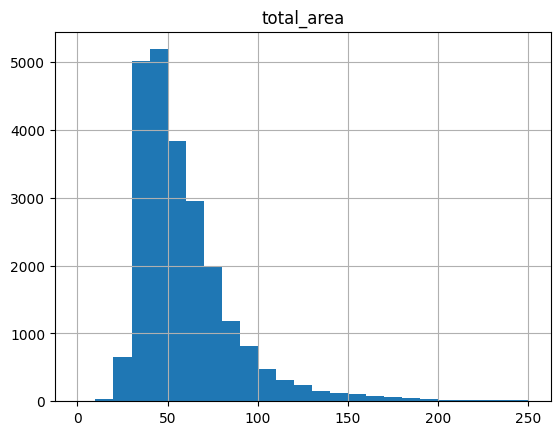

In [72]:
data.hist("total_area", range=(0, 250), bins=25)

Гистограмма по площадям квартир представляет собой нормальное распределение с поправкой на тот факт, что квартиры менее 20 квадратов весьма редкое явление, в то время как большие площади встречаются чаще. Больше всего квартир с площадью 40-50 квадратов, чуть меньше 20-30 квадратов. В целом, это хорошо согласуется с распредлением квартир по количеству комнат

#### living_area

array([[<Axes: title={'center': 'living_area'}>]], dtype=object)

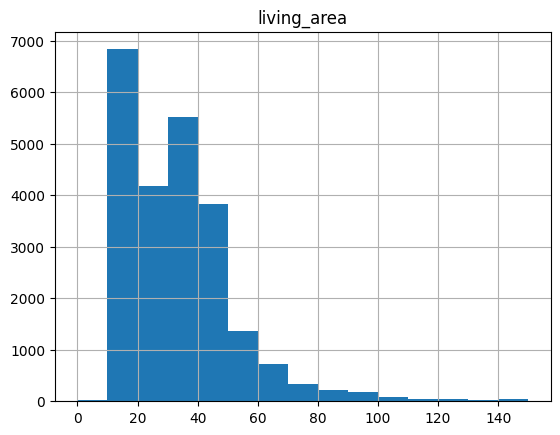

In [73]:
data.hist("living_area", range=(0, 150), bins=15)

Определимся что мы считаем жилой площадью: примем, что жилая площадь это площадь жилых комнат, т.е спален, детских, гостинных. На гистограмме наблюдается два пика: 10-20 квадратов и 30-40 квадратов. Это может быть связано с различиями в планировках квартир и тем, как в связи с этим считается жилая площадь. Так, в евро-двушках из-за объединения гостинной и кухни  за жилую площадь будет считается лишь спальня (пик 10-20 метров). В этот же пик входят однушки, где площадь комнаты редко превышает 20 квадратов. Второй пик отражает "классические" двухкомнатные квартиры с отдельной кухней, а также "трешки" различных форматов

#### kitchen_area

array([[<Axes: title={'center': 'kitchen_area'}>]], dtype=object)

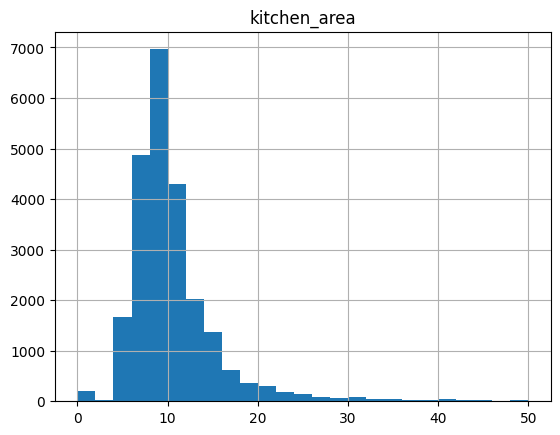

In [74]:
data.hist("kitchen_area", range=(0, 50), bins=25)

Нормальное распределение с пиком в диапазоне 8-10 метров. Есть неождинный пик в диапазоне 0-2 квадрата. Скорее всего он связан с специфичной трактовкой распределения площади помещения в студиях. Проверим это

In [75]:
data[data["kitchen_area"] <= 2]["studio"].value_counts()

studio
True     135
False     67
Name: count, dtype: int64

Действительно, большинство таких квартир являются студиями, значит ошибки в данных нет

#### last_price

array([[<Axes: title={'center': 'last_price'}>]], dtype=object)

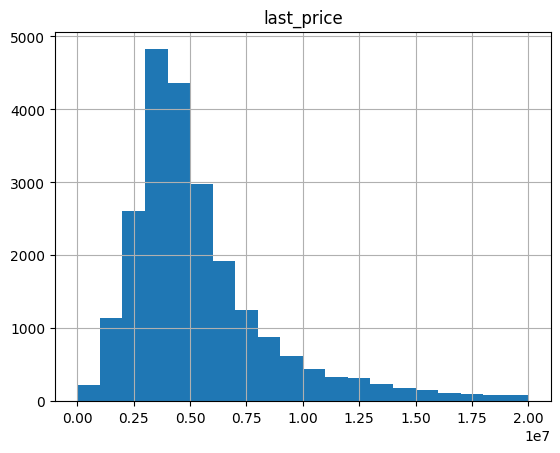

In [76]:
data.hist("last_price", range=(0, 20000000), bins=20)

Эх, когда-то студии в Кудрово продавали по 900 т.р.... Наблюдаем нормальное распределение с пиком в районе 3 млн. руб. Вполне соответствует реалиям 2015-2018 годов 

#### rooms

array([[<Axes: title={'center': 'rooms'}>]], dtype=object)

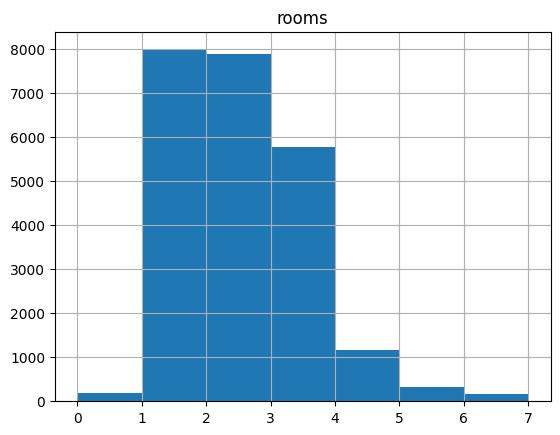

In [77]:
data.hist("rooms", range=(0, 7), bins=7)

Много однокомнатных, двухкомнатных квартир. Чуть меньше трехкомнатных. По данной гистограмме выходит, что студий всего в районе 200 квартир. Это интересно и требует проверки по столбцу studio

In [78]:
data[data["studio"] == True]["studio"].count()

146

Действительно, во всем датасете всего 146 студий. Поразительно мало, учитывая, сколько человейников было построено за последние 15 лет

#### ceiling_height

array([[<Axes: title={'center': 'ceiling_height'}>]], dtype=object)

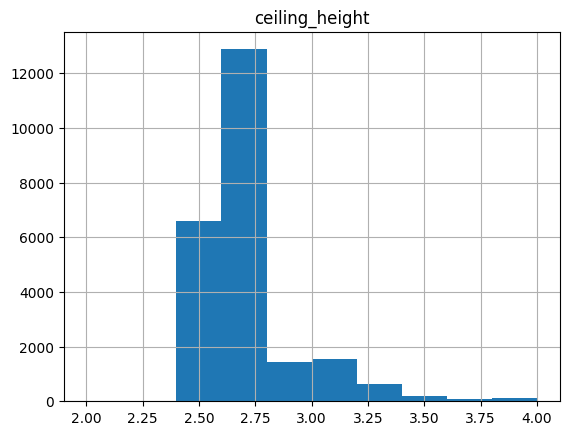

In [79]:
data.hist("ceiling_height", range=(2, 4), bins=10)

Ожидаемый пик в районе 2.6-2.8 метров. Тут анализировать особо нечего, но отмечу что квартир с скромной высотой потолков ~2.5 метра весьма много, аж 6 тысяч объявлений

#### floor

array([[<Axes: title={'center': 'floor'}>]], dtype=object)

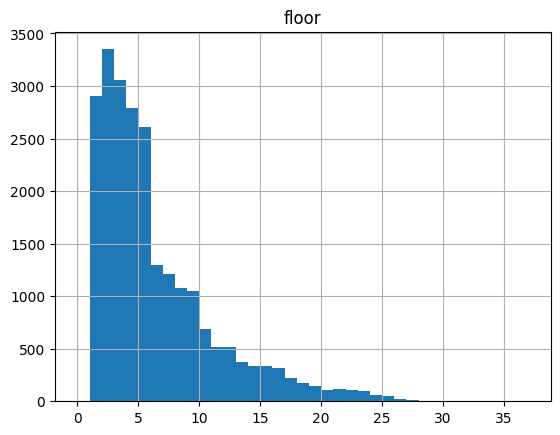

In [80]:
data.hist("floor", range=(0, 37), bins=37)

По сути данное распределение показывает что квартира на этаже n встречается также часто, как n-1 и n+1, и различия в частоте определенного этажа связаны лишь с этажностью зданий, т.е. параметром floors_total

#### floor_type

floor_type
Другой       17317
Последний     3329
Первый        2907
Name: count, dtype: int64

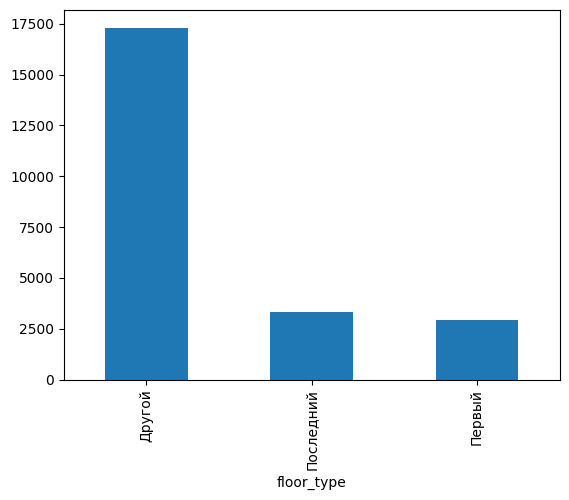

In [81]:
floor_type_count = data["floor_type"].value_counts()
floor_type_count.plot(kind="bar")
floor_type_count

Воспользуемся графиком типа bar, поскольку параметр floor_type принимает значения типа str. Распределение выглядит вполне органично: квартир на первом и последнем этажах приблизительно равное количество, в то время как квартир на других этажах значительно больше

#### floors_total

array([[<Axes: title={'center': 'floors_total'}>]], dtype=object)

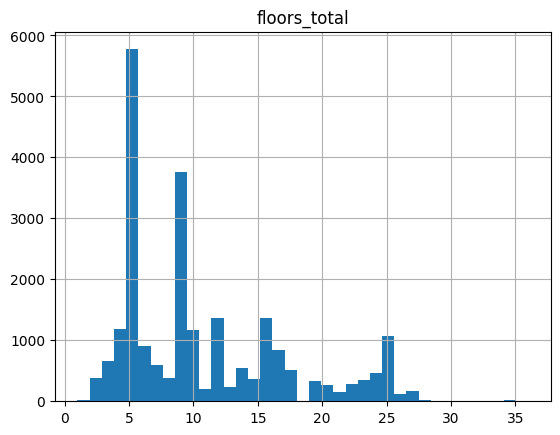

In [82]:
data.hist("floors_total", bins=37)

Пики соответствуют стандартным значениям этажности здания: 5, 9, 12, 16, 25 этажей

#### city_centers_nearest

array([[<Axes: title={'center': 'city_centers_nearest'}>]], dtype=object)

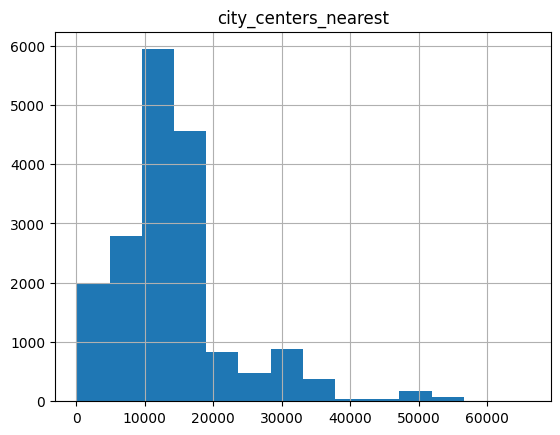

In [83]:
data.hist("city_centers_nearest", bins=14)

Большинство квартир находятся на расстоянии ~15 км от центра Санкт-Петербурга. Пики в районе 30 и 50 км, вероятно, связаны с крупными населенными пунктами в Лен.области

#### airports_nearest

array([[<Axes: title={'center': 'airports_nearest'}>]], dtype=object)

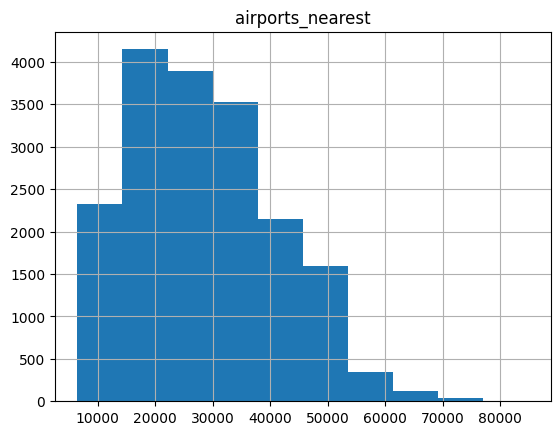

In [84]:
data.hist("airports_nearest", bins=10)

Большинство квартир находятся на расстоянии 20-30 км от аэропорта, что соответствует значительной части спальных районов на правом берегу Невы

#### parks_nearest

array([[<Axes: title={'center': 'parks_nearest'}>]], dtype=object)

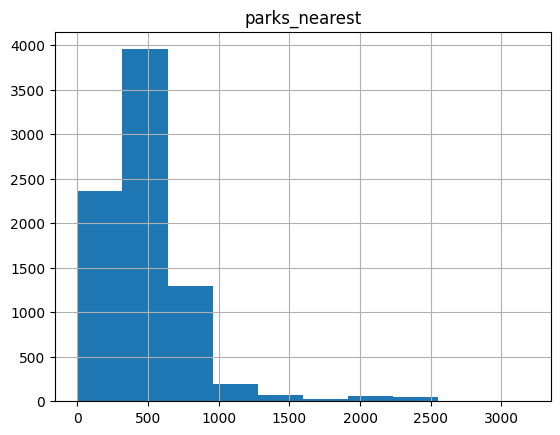

In [85]:
data.hist("parks_nearest", bins=10)

В среднем, ближайший парк находится на расстоянии 500 метров от дома, а то и ближе. Звучит весьма неплохо!

#### day

array([[<Axes: title={'center': 'day'}>]], dtype=object)

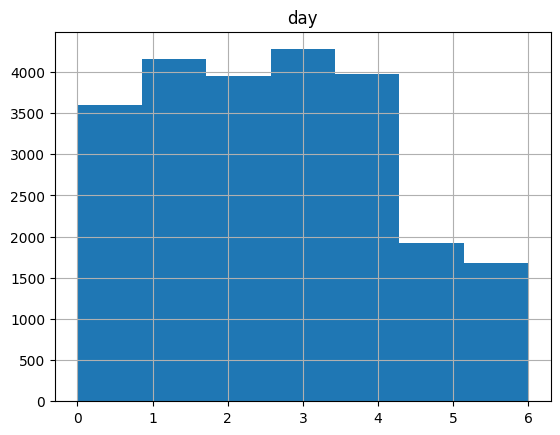

In [86]:
data.hist("day", bins=7)

Люди не сильно любят выставлять квартиру на продажу по выходным, а также слегка недолюбливают понедельник. По мнению больлинства, лучший день для этого - четверг

#### month

array([[<Axes: title={'center': 'month'}>]], dtype=object)

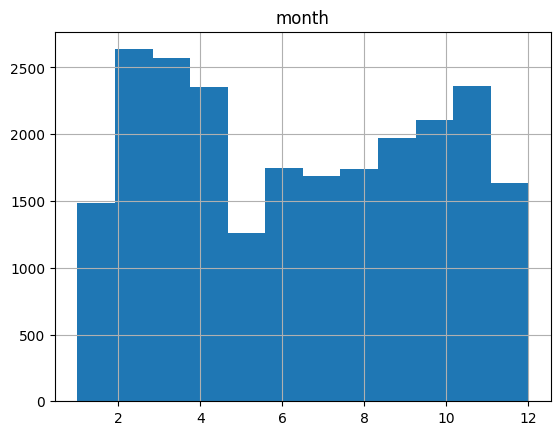

In [87]:
data.hist("month", bins=12)

Квартиры не охотно выставляют перед новый годом и после, а также на майских. Впрочем, летом желающих тоже меньше, чем в "рабочие" зимне-весенние и осенние месяцы

### Скорость продажи квартиры

count    20382.000000
mean       180.745020
std        219.762908
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

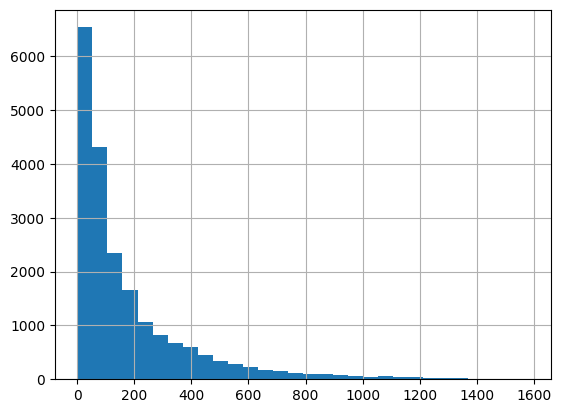

In [88]:
data["days_exposition"].hist(bins=30)
data["days_exposition"].describe()

Кажется, перед нами геометрическое распределение. Ведь скорость продажи квартиры аналогична вопросу "сколько раз выпадет решка перед тем как выпадет орел?". Половина всех проданных за исследуемый период квартир была продана менее чем за 100 дней, а в среднем на продажу квартиры уходит 180 дней. Быстрой продажей можно считать продажи в первом квартиле, т.е до 45 дней, а необычно долгой - за третьим квартилем, т.е более 230 дней

Рассмотрим наиболее бурный период до 100-го дня более подробно

<Axes: >

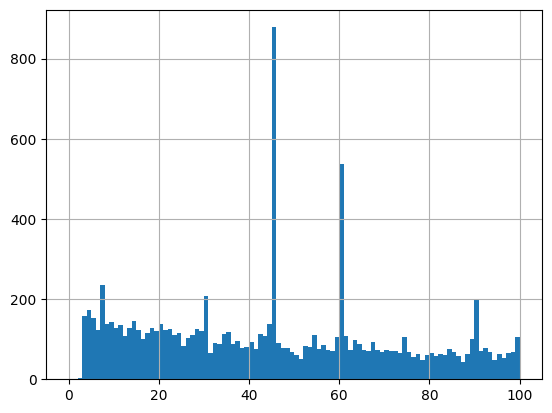

In [89]:
data["days_exposition"].hist(bins=100, range=(0, 100))

Гистограмма имеет множество небольших пиков, три средних (6-й, 30-й и 90-й день) и два зашкаливающих (45-й и 60-й день). Таким образом, можно утверждать, что наибольшая вероятность продать квартиру приходится на 45-й день с момента создания объявления 

### Факторы, влияющие на полную стоимость

In [90]:
data_factors = data[
    [
        "last_price",
        "total_area",
        "living_area",
        "kitchen_area",
        "rooms",
        "floor",
        "floor_type",
        "first_day_exposition",
        "year",
        "month",
        "day",
        "locality_name_new",
    ]
]
data_factors.head()

,last_price,total_area,living_area,kitchen_area,rooms,floor,floor_type,first_day_exposition,year,month,day,locality_name_new
0,13000000,108.0,51.0,25.0,3,8,Другой,2019-03-07,2019,3,3,Санкт-Петербург
1,3350000,40.4,18.6,11.0,1,1,Первый,2018-12-04,2018,12,1,Шушары
2,5196000,56.0,34.3,8.3,2,4,Другой,2015-08-20,2015,8,3,Санкт-Петербург
3,64900000,159.0,45.0,9.5,3,9,Другой,2015-07-24,2015,7,4,Санкт-Петербург
4,10000000,100.0,32.0,41.0,2,13,Другой,2018-06-19,2018,6,1,Санкт-Петербург


#### Площадь квартиры

<Axes: xlabel='total_area', ylabel='last_price'>

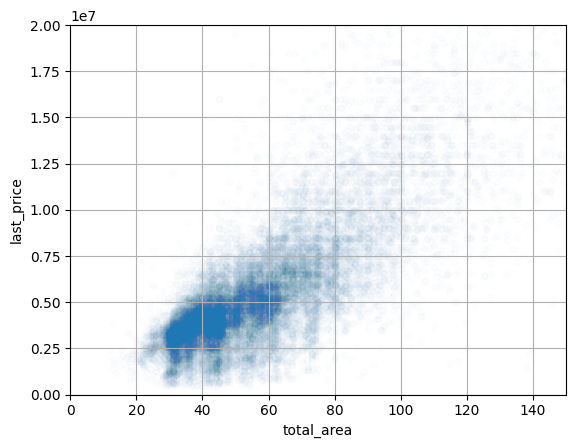

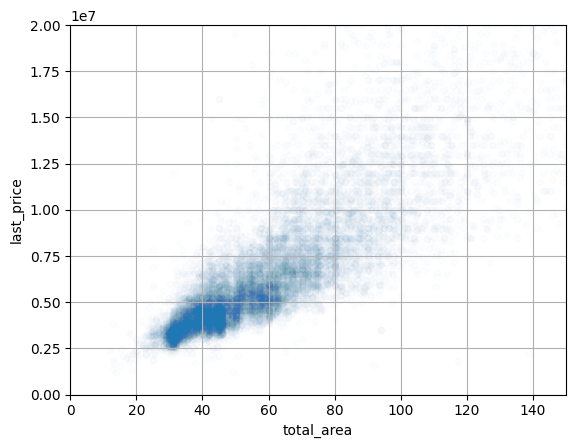

In [91]:
data_factors.plot(
    kind="scatter",
    x="total_area",
    y="last_price",
    xlim=(0, 150),
    ylim=(0, 20000000),
    alpha=0.01,
    grid=True,
)
data_factors.query('locality_name_new == "Санкт-Петербург"').plot(
    kind="scatter",
    x="total_area",
    y="last_price",
    xlim=(0, 150),
    ylim=(0, 20000000),
    alpha=0.01,
    grid=True,
)

В среднем, имеется тенденция к росту стоимостью квартиры с ростом общей площади  
Посмотрим, какова корреляция параметров в целом, в Санкт-Петербурге и в Лен. области

In [92]:
print(
    "Корреляция между ценой и общей площадью:",
    data["last_price"].corr(data["total_area"]),
)
print(
    "Корреляция между ценой и общей площадью в Санкт-Петербурге:",
    data.query('locality_name_new == "Санкт-Петербург"')["last_price"].corr(
        data["total_area"]
    ),
)
print(
    "Корреляция между ценой и общей площадью в Ленинградской области:",
    data.query('locality_name_new != "Санкт-Петербург"')["last_price"].corr(
        data["total_area"]
    ),
)

Корреляция между ценой и общей площадью: 0.6537356404661405
Корреляция между ценой и общей площадью в Санкт-Петербурге: 0.6572159525698653
Корреляция между ценой и общей площадью в Ленинградской области: 0.7180649663532389


Корреляция весьма заметна и в Лен.области даже выше, чем в Санкт-Петербурге

#### Жилая площадь

<Axes: xlabel='living_area', ylabel='last_price'>

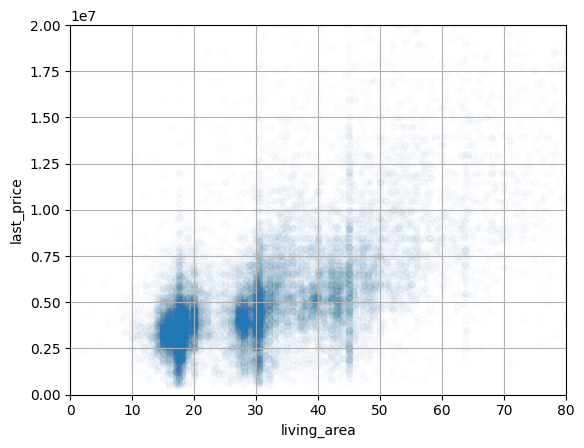

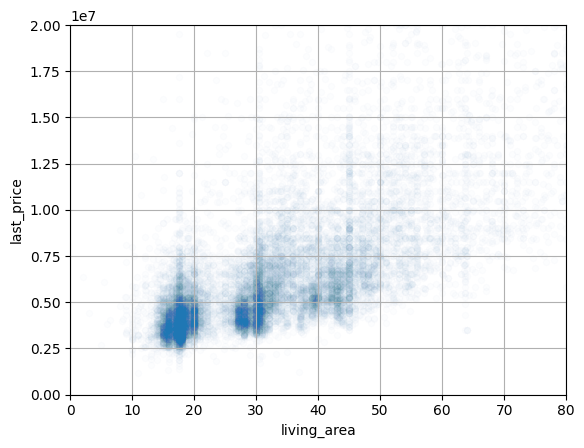

In [93]:
data_factors.plot(
    kind="scatter",
    x="living_area",
    y="last_price",
    xlim=(0, 80),
    ylim=(0, 20000000),
    alpha=0.01,
    grid=True,
)
data_factors.query('locality_name_new == "Санкт-Петербург"').plot(
    kind="scatter",
    x="living_area",
    y="last_price",
    xlim=(0, 80),
    ylim=(0, 20000000),
    alpha=0.01,
    grid=True,
)

Наблюдаются несколько "очагов", связанных с наиболее типичными значениями жилой площади. В целом, имеется планомерный рост стоимости квартиры с ростом жилой площади

In [94]:
print(
    "Корреляция между ценой и жилой площадью:",
    data["last_price"].corr(data["living_area"]),
)
print(
    "Корреляция между ценой и жилой площадью в Санкт-Петербурге:",
    data.query('locality_name_new == "Санкт-Петербург"')["last_price"].corr(
        data["living_area"]
    ),
)
print(
    "Корреляция между ценой и жилой площалью в Ленинградской области:",
    data.query('locality_name_new != "Санкт-Петербург"')["last_price"].corr(
        data["living_area"]
    ),
)

Корреляция между ценой и жилой площадью: 0.556104121668618
Корреляция между ценой и жилой площадью в Санкт-Петербурге: 0.5618904687175424
Корреляция между ценой и жилой площалью в Ленинградской области: 0.5691596355588554


Корреляция несколько меньше, чем в случае с общей площадью. Вероятно, это связано с определенной специфичностью данного параметра в силу существования различных методов для его расчета. Большой разницы между Санкт-Петербургом и Лен.областью нет

#### Площадь кухни

<Axes: xlabel='kitchen_area', ylabel='last_price'>

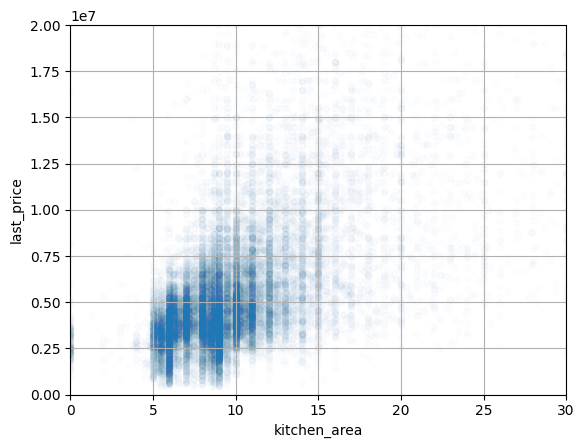

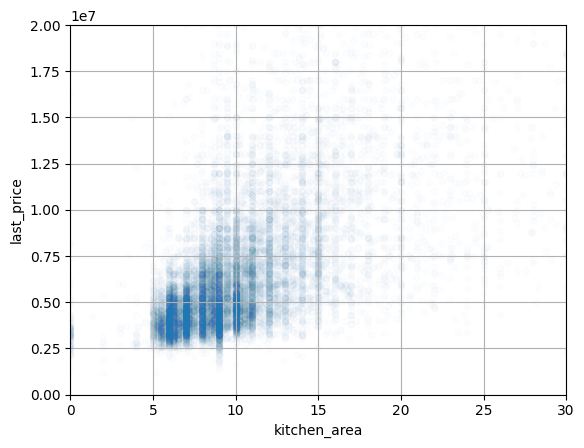

In [95]:
data_factors.plot(
    kind="scatter",
    x="kitchen_area",
    y="last_price",
    xlim=(0, 30),
    ylim=(0, 20000000),
    alpha=0.01,
    grid=True,
)
data_factors.query('locality_name_new == "Санкт-Петербург"').plot(
    kind="scatter",
    x="kitchen_area",
    y="last_price",
    xlim=(0, 30),
    ylim=(0, 20000000),
    alpha=0.01,
    grid=True,
)

In [96]:
print(
    "Корреляция между ценой и площадью кухни:",
    data["last_price"].corr(data["kitchen_area"]),
)
print(
    "Корреляция между ценой и площадью кухни в Санкт-Петербурге:",
    data.query('locality_name_new == "Санкт-Петербург"')["last_price"].corr(
        data["kitchen_area"]
    ),
)
print(
    "Корреляция между ценой и площадью кухни в Ленинградской области:",
    data.query('locality_name_new != "Санкт-Петербург"')["last_price"].corr(
        data["kitchen_area"]
    ),
)

Корреляция между ценой и площадью кухни: 0.45202853760649936
Корреляция между ценой и площадью кухни в Санкт-Петербурге: 0.4525007058177402
Корреляция между ценой и площадью кухни в Ленинградской области: 0.5501049246161659


Площадь кухни имеет еще более слабое, по сравнению с общей площадью, но все же значительное влияние на стоимость квартиры. Корреляция в Области больше, чем в Санкт-Петербурге

#### Количество комнат

<Axes: xlabel='rooms', ylabel='last_price'>

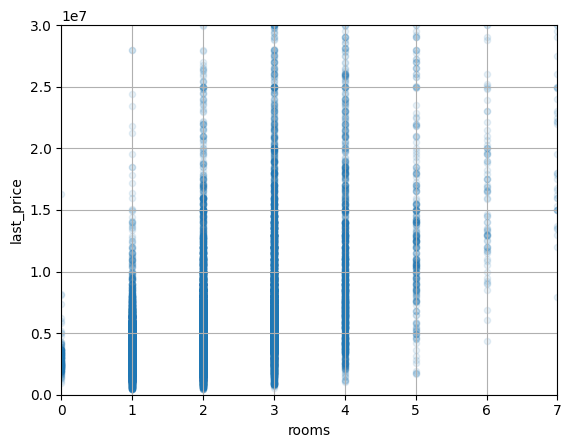

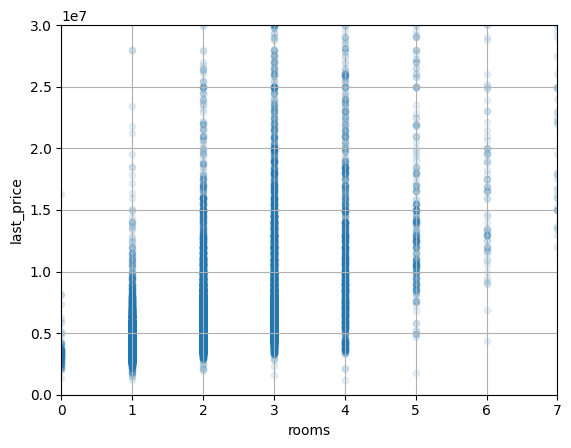

In [97]:
data_factors.plot(
    kind="scatter",
    x="rooms",
    y="last_price",
    xlim=(0, 7),
    ylim=(0, 30000000),
    alpha=0.1,
    grid=True,
)
data_factors.query('locality_name_new == "Санкт-Петербург"').plot(
    kind="scatter",
    x="rooms",
    y="last_price",
    xlim=(0, 7),
    ylim=(0, 30000000),
    alpha=0.1,
    grid=True,
)

In [98]:
print("Корреляция между ценой и числом комнат:", data["last_price"].corr(data["rooms"]))
print(
    "Корреляция между ценой и числом комнат в Санкт-Петербурге:",
    data.query('locality_name_new == "Санкт-Петербург"')["last_price"].corr(
        data["rooms"]
    ),
)
print(
    "Корреляция между ценой и числом комнат в Ленинградской области:",
    data.query('locality_name_new != "Санкт-Петербург"')["last_price"].corr(
        data["rooms"]
    ),
)

Корреляция между ценой и числом комнат: 0.3632350112932005
Корреляция между ценой и числом комнат в Санкт-Петербурге: 0.3721526422748667
Корреляция между ценой и числом комнат в Ленинградской области: 0.4115604318090593


Число комнат положительно сказывается на стоимости квартиры, однако не так заметно, как площадь. Корреляция в Области больше, чем в Санкт-Петербурге

#### Этаж

<Axes: xlabel='floor', ylabel='last_price'>

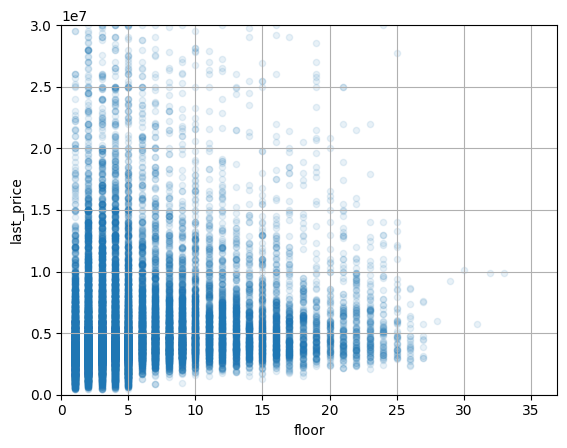

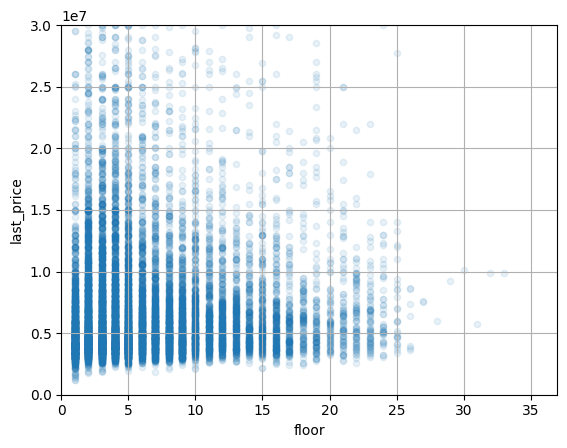

In [99]:
data_factors.plot(
    kind="scatter",
    x="floor",
    y="last_price",
    xlim=(0, 37),
    ylim=(0, 30000000),
    alpha=0.1,
    grid=True,
)
data_factors.query('locality_name_new == "Санкт-Петербург"').plot(
    kind="scatter",
    x="floor",
    y="last_price",
    xlim=(0, 37),
    ylim=(0, 30000000),
    alpha=0.1,
    grid=True,
)

In [100]:
print("Корреляция между ценой и этажом:", data["last_price"].corr(data["floor"]))

print(
    "Корреляция между ценой и этажом в Санкт-Петербурге:",
    data.query('locality_name_new == "Санкт-Петербург"')["last_price"].corr(
        data["floor"]
    ),
)

print(
    "Корреляция между ценой и этажом в Ленинградской области:",
    data.query('locality_name_new != "Санкт-Петербург"')["last_price"].corr(
        data["floor"]
    ),
)

Корреляция между ценой и этажом: 0.027034327058192215
Корреляция между ценой и этажом в Санкт-Петербурге: -0.00027565120595768143
Корреляция между ценой и этажом в Ленинградской области: 0.11741593642351608


Связь между стоимостью квартиры и номером этажа практически отсутствует

Небольшое наблюдение: после того, как с графика была убрана Лен. область, пропала область дешевых квартир малой этажности. В остальном, график выглядит так же. Такой вот странный способ доказать, что все высотки находятся в Питере :) 

#### Тип этажа

<Axes: xlabel='floor_type', ylabel='last_price'>

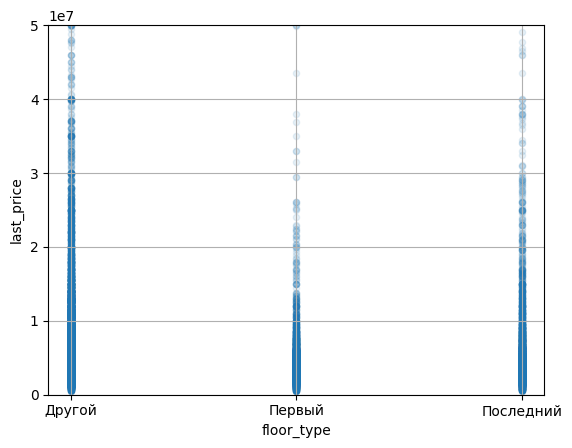

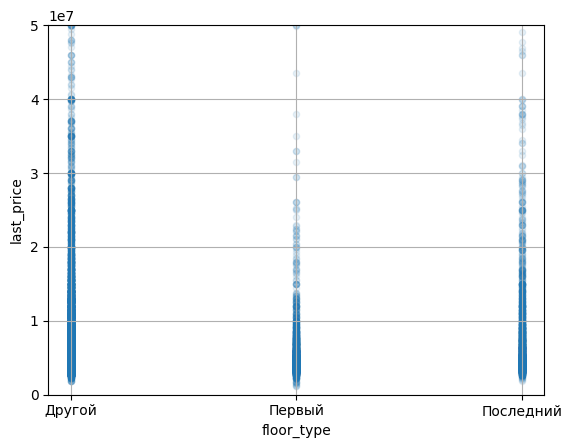

In [101]:
data_factors.plot(
    kind="scatter",
    x="floor_type",
    y="last_price",
    ylim=(0, 50000000),
    alpha=0.1,
    grid=True,
)
data_factors.query('locality_name_new == "Санкт-Петербург"').plot(
    kind="scatter",
    x="floor_type",
    y="last_price",
    ylim=(0, 50000000),
    alpha=0.1,
    grid=True,
)

Посчитать корреляцию между int и str, увы, не получится, поэтому придется ориентироваться на гистограммы.

Судя по плотности точек в каждом из столбцов, у квартир на первом этаже существует некий "потолок" цены (около 25 млн), после которого объекты практически перестают появляться в выборке. Похожая ситуация наблюдается в случае квартир на последнем этаже, только там этот потолок находится на отметке около 40 млн. В случае же квартир на этаже типа "другой", значительное снижение плотности находится за пределами текущего диапазона цен на графике. Таким образом, можно заключить что квартиры на этаже типа "другой" чаще продаются по более высокой цене, чем квартиры на этажах двух других типов. 

#### Дата размещения

<Axes: xlabel='year', ylabel='last_price'>

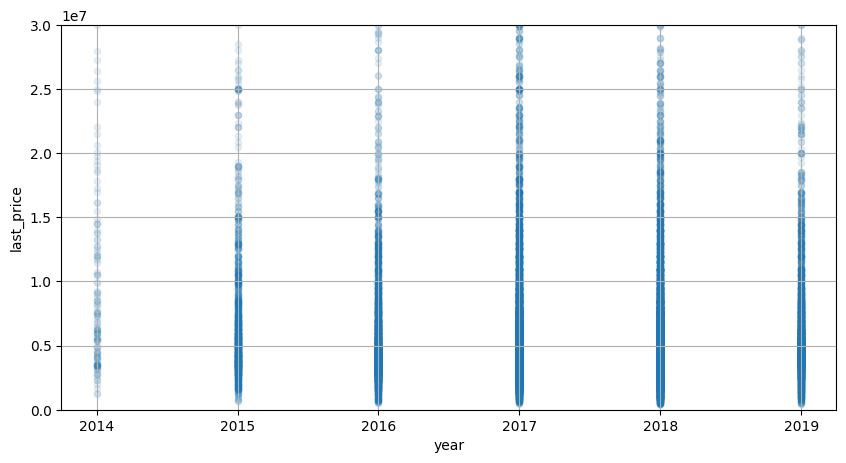

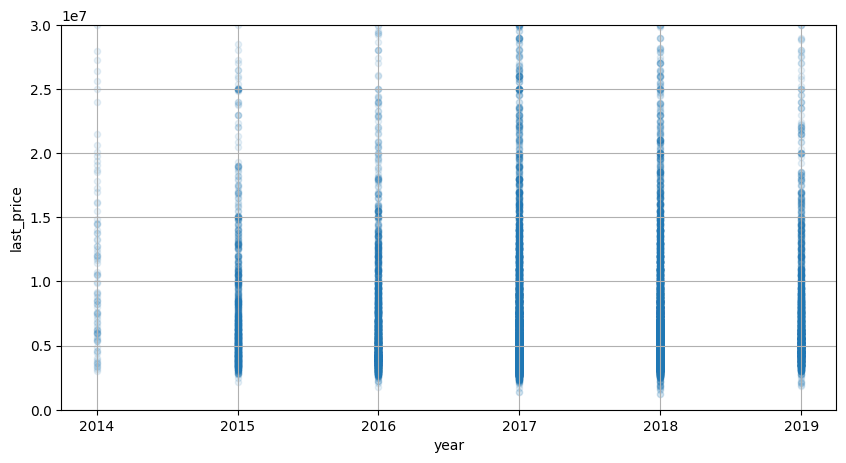

In [102]:
data_factors.plot(
    kind="scatter",
    x="year",
    y="last_price",
    ylim=(0, 30000000),
    alpha=0.1,
    grid=True,
    figsize=(10, 5),
)
data_factors.query('locality_name_new == "Санкт-Петербург"').plot(
    kind="scatter",
    x="year",
    y="last_price",
    ylim=(0, 30000000),
    alpha=0.1,
    grid=True,
    figsize=(10, 5),
)

In [103]:
print(
    "Корреляция между ценой и годом публикации объявления:",
    data["last_price"].corr(data["year"]),
)
print(
    "Корреляция между ценой и годом публикации объявления в Санкт-Петербурге:",
    data.query('locality_name_new == "Санкт-Петербург"')["last_price"].corr(
        data["year"]
    ),
)
print(
    "Корреляция между ценой и годом публикации объявления в Ленинградской области:",
    data.query('locality_name_new != "Санкт-Петербург"')["last_price"].corr(
        data["year"]
    ),
)

Корреляция между ценой и годом публикации объявления: -0.04281729702475979
Корреляция между ценой и годом публикации объявления в Санкт-Петербурге: -0.04453063681622526
Корреляция между ценой и годом публикации объявления в Ленинградской области: -0.031438267321750264


Корреляция имеет незначительные значения и отрицательна как в Лен.области, так и в Санкт-Петербурге. Весьма странно, ведь в течение всего десятилетия цены на квартиры только росли. Видимо, это особенность конкретно данной выборки

<Axes: xlabel='month', ylabel='last_price'>

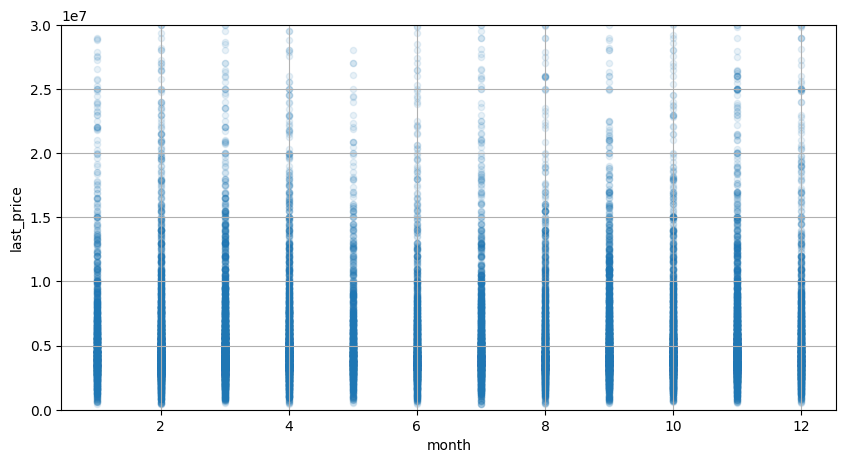

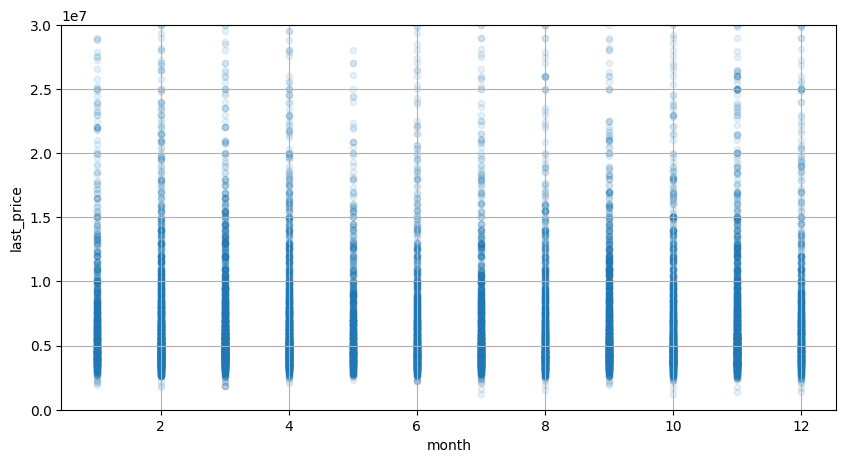

In [104]:
data_factors.plot(
    kind="scatter",
    x="month",
    y="last_price",
    ylim=(0, 30000000),
    alpha=0.1,
    grid=True,
    figsize=(10, 5),
)
data_factors.query('locality_name_new == "Санкт-Петербург"').plot(
    kind="scatter",
    x="month",
    y="last_price",
    ylim=(0, 30000000),
    alpha=0.1,
    grid=True,
    figsize=(10, 5),
)

In [105]:
print(
    "Корреляция между ценой и месяцем публикации объявления:",
    data["last_price"].corr(data["month"]),
)
print(
    "Корреляция между ценой и месяцем публикации объявления в Санкт-Петербурге:",
    data.query('locality_name_new == "Санкт-Петербург"')["last_price"].corr(
        data["month"]
    ),
)
print(
    "Корреляция между ценой и месяцем публикации объявления в Ленинградской области:",
    data.query('locality_name_new != "Санкт-Петербург"')["last_price"].corr(
        data["month"]
    ),
)

Корреляция между ценой и месяцем публикации объявления: 0.002690280888222566
Корреляция между ценой и месяцем публикации объявления в Санкт-Петербурге: -1.4244115765397005e-05
Корреляция между ценой и месяцем публикации объявления в Ленинградской области: 0.01648144067548306


Корреляция между месяцем публикации объявления и стоимостью объекта отсутствует

<Axes: xlabel='day', ylabel='last_price'>

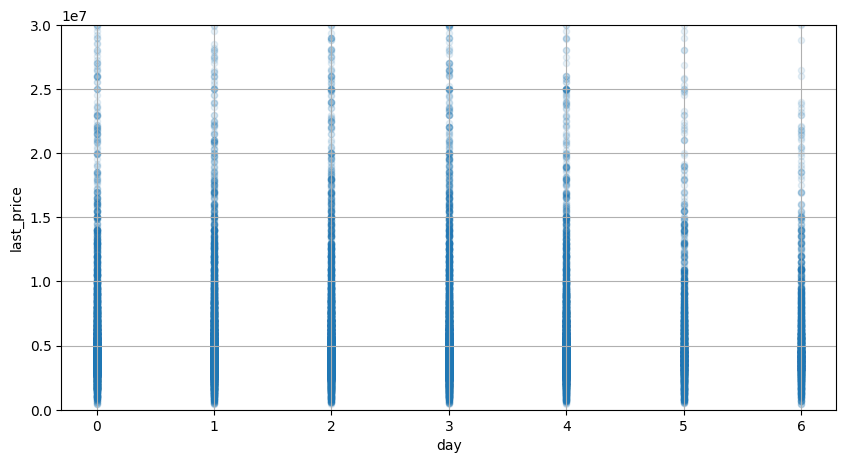

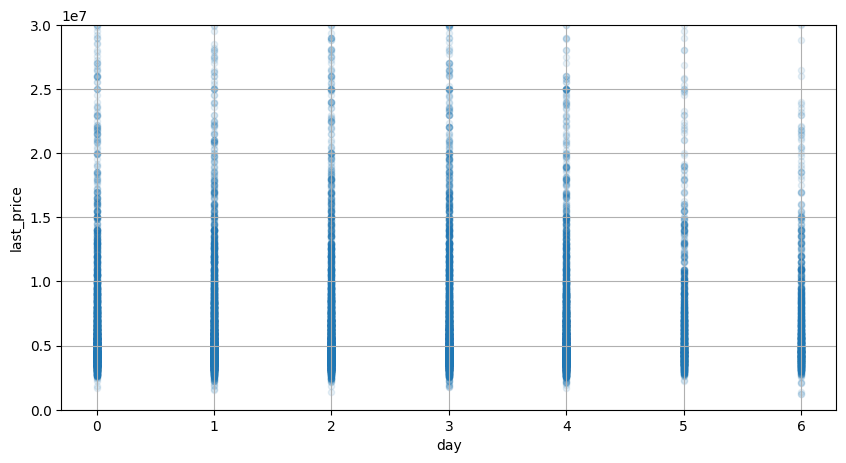

In [106]:
data_factors.plot(
    kind="scatter",
    x="day",
    y="last_price",
    ylim=(0, 30000000),
    alpha=0.1,
    grid=True,
    figsize=(10, 5),
)
data_factors.query('locality_name_new == "Санкт-Петербург"').plot(
    kind="scatter",
    x="day",
    y="last_price",
    ylim=(0, 30000000),
    alpha=0.1,
    grid=True,
    figsize=(10, 5),
)

In [107]:
print(
    "Корреляция между ценой и днем публикации объявления:",
    data["last_price"].corr(data["day"]),
)
print(
    "Корреляция между ценой и днем публикации объявления в Санкт-Петербурге:",
    data.query('locality_name_new == "Санкт-Петербург"')["last_price"].corr(
        data["day"]
    ),
)
print(
    "Корреляция между ценой и днем публикации объявления в Ленинградской области:",
    data.query('locality_name_new != "Санкт-Петербург"')["last_price"].corr(
        data["day"]
    ),
)

Корреляция между ценой и днем публикации объявления: 0.0013270639485023668
Корреляция между ценой и днем публикации объявления в Санкт-Петербурге: 0.006025207656338587
Корреляция между ценой и днем публикации объявления в Ленинградской области: -0.020045297126378193


Корреляция между днем публикации объявления и ценой объекта отсутствует

###  Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Посчитаем среднюю цену квадратного метра в топ10 населенных пунктах по числу объявлений

In [108]:
data.groupby("locality_name_new").agg(
    {"locality_name_new": "count", "square_meter_price": "mean"}
).rename(
    columns={
        "locality_name_new": "count",
        "square_meter_price": "square_meter_price_mean",
    }
).sort_values(
    by="count", ascending=False
).head(
    10
).sort_values(
    by="square_meter_price_mean", ascending=False
)

,count,square_meter_price_mean
locality_name_new,,
Санкт-Петербург,15643,114849.276098
Пушкин,369,103125.818428
Кудрово,470,95260.872340
Парголово,327,90175.886850
Мурино,586,86041.114334
Шушары,439,78551.359909
Колпино,338,75424.571006
Гатчина,307,68746.110749
Всеволожск,398,68654.474874


Самый дорогой квадратный метр - в Санкт-Петерубрге, самый дешевый - в Выборге

In [109]:
data.groupby("locality_name").agg(
    {"balcony": "count", "last_price": "median"}
).sort_values(by="balcony", ascending=False).head(10)

,balcony,last_price
locality_name,,
Санкт-Петербург,15643,5500000.0
посёлок Мурино,520,3400000.0
посёлок Шушары,439,3950000.0
Всеволожск,398,3450000.0
Пушкин,369,5180000.0
Колпино,338,3600000.0
посёлок Парголово,327,4100000.0
Гатчина,307,3100000.0
деревня Кудрово,299,3790000.0


### Средняя цена километра относительно центра города в Санкт-Петербурге

Как уже было выяснено ранее, общая стоимость квартиры определяется множеством факторов. Поэтому для оценки средней стоимости километра возьмем менее подверженный выбросам параметр - цену квадратного метра

С каждым километром в среднем цена падает на 5961 рублей


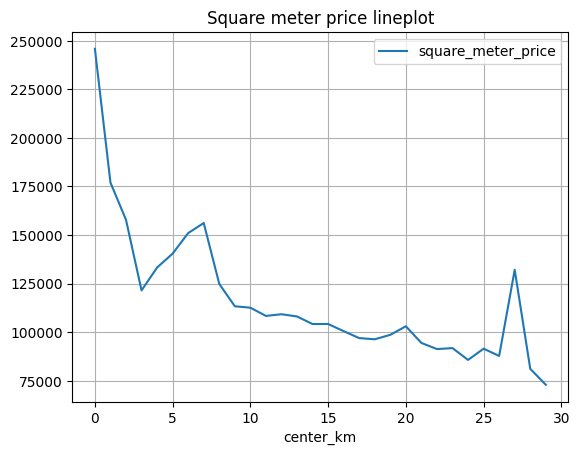

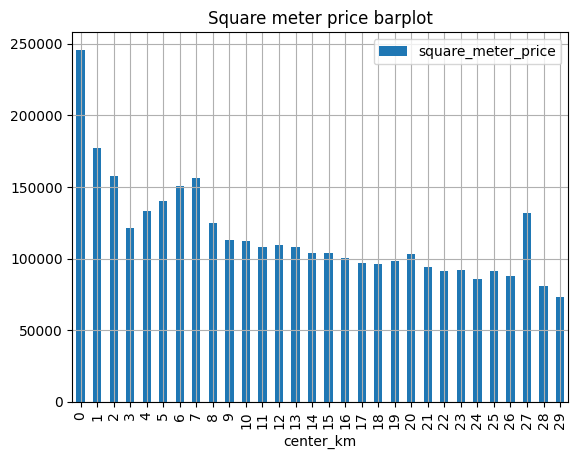

In [110]:
center_proximity_pivot = data.query(
    'locality_name_new == "Санкт-Петербург"'
).pivot_table(index="center_km", values="square_meter_price", aggfunc="mean")
dx = []

for index in center_proximity_pivot.index:
    try:
        dx.append(
            center_proximity_pivot.loc[index, "square_meter_price"]
            - center_proximity_pivot.loc[index + 1, "square_meter_price"]
        )
    except:
        continue

center_proximity_pivot.index = center_proximity_pivot.index.astype(int)
dx = pd.Series(data=dx)
print(f"С каждым километром в среднем цена падает на {round(dx.mean())} рублей")
center_proximity_pivot.plot(grid=True, title="Square meter price lineplot")
center_proximity_pivot.plot.bar(grid=True, title="Square meter price barplot")

На графиках видно, что на расстоянии 5-7 км и 27 км от центра происходит скачок стоимости квадратного метра. Вероятно, это связано с дорогими районами Санкт-Петербурга и Ленинградской области, например, Крестовским островом. Поскольку данные по Санкт-Петербургу не разбиты на районы, посмотрим что происходит в 27 км от центра

In [111]:
data[data["center_km"] == 27][["locality_name_new", "square_meter_price"]].sort_values(
    by="square_meter_price", ascending=False
).head(10)

,locality_name_new,square_meter_price
2404,Пушкин,256522.0
744,Санкт-Петербург,193919.0
12391,Пушкин,167411.0
140,Пушкин,160000.0
7255,Пушкин,159000.0
15487,Пушкин,157017.0
7951,Пушкин,156604.0
4377,Пушкин,156389.0
2935,Пушкин,151333.0
21549,Пушкин,145312.0


### Вывод по разделу

На полную стоимость объекта недвижимости позитивно влияют следующие факторы:
1. Площадь квартиры
2. Площадь жилых помещений
3. Площадь кухни
4. Количество комнат
5. Близость к центру города

## Общий вывод

В ходе выполнения проекта был обработан датасет, содержащий различную информацию по объектам недвижимости, выставлявшися на продажу через ресурс Яндекс.Недвижимость в 2014-2019 годах. Данные потребовали значительной предобработки с целью устранения пропусков или дубликатов, а также рассмотрения аномалий и поиска выбросов. Далее были добавлены новые столбцы, содержащие данные по цене одного квадратного метра, а также днем, месяцем и годом публикации, типом этажа и расстоянием до центра города в километрах.  

Проведен графический анализ набора данных по интересующим столбцам. Рассмотрены некоторые факторы, влияющие на полную стоимость квартиры, с целью поиска полезных закономерностей. Проводен анализ скорости продажи объектов. Рассчитана средняя стоимость удаления объекта недвижимости от центра Санкт-Петербурга.

Результатом выполнения проекта являются следующие выводы:


- Площадь жилых помещений имеет несколько пиков на количественной гистограмме в связи с различиями в планировках квартир и тем, как классифицируются помещения: так, в квартирах евро-формата жилая площадь будет меньше из-за объединения гостинных и кухонь
- Такие параметры, как общая площадь, жилая площадь, площадь кухни и число комнат имеют заметное позитивное влияние на стоимость квартиры. Номер этажа и дата публикации практическин не коррелируют со стоимостью квартиры. Наблюдается более низкий потолок цен для типов этажа "Первый" и "Последний" относительно типа "Другой". Особенно неожиданно, что в течение рассматриваемого периода времени цены на квартиры даже слегка упали
- В среднем, с удалением от центра Санкт-Петербурга на 1 км цена квадратного метра падает на 6 тысяч рублей
- Среди топ10 населенных пунктов по числу объявлений, наиболее дорогой квадратный метр - в Санкт-Петербурге, дешевый - в Выборге
- На продажу квартиры в среднем уходит около 100 дней. Продажа в течение полутора месяцев со дня публикации объявления считается быстрой, долгой - при нахождении объявления на сайте более 230 дней. Существуют "особые" дни, в которые вероятность продажи объекта резко возрастает: 45-й и 60-й.
- В выходные дни выставляется в половину меньше объявлений, чем в будние. Также наблюдается спад числа объявлений перед крупными праздниками (новый год, майские праздники) и в летние месяцы
- В среднем, квартира находится на расстоянии полукилометра до ближайшего парка и 15 километров до аэропорта

